In [1]:
from google.colab import files
uploaded = files.upload()

Saving data-nonlinear.txt to data-nonlinear.txt


In [0]:
import numpy as np 
from matplotlib import pyplot as plt 
import csv
import copy
import math
from sympy import * 
init_printing(use_latex='mathjax')

from IPython.display import display

#compute z
def compute_z (theta, data):
  z = np.dot(data,np.transpose(theta))
  return z


#compute prediction
def compute_prediction (theta,data):
  z=[]
  for i in range(len(data)):
    z.append(compute_z(theta,data[i]))
  prediction = []
  for i in range(len(z)):
    prediction.append(1.0/(1+np.exp(-z[i])))

  return prediction


# Objective Function
def compute_cost(theta, data, l, ld):
  m = float(len(l))
  prediction = compute_prediction(theta, data)
  prediction=np.array(prediction)
  l=np.array(l)
  
  J = (1/m)*(np.sum(-l*np.log(prediction)-(1-l)*np.log(1-prediction))) + (ld/2)*(np.sum(theta**2))
  
  return J

# get theta, theta_history, J_history, accuracy_history
def compute_theta(theta, data, l, alpha, num, ld):
  m = float(len(data))
  J_history=[]
  theta_history=[]
  accuracy_history=[]
  J_history.append(compute_cost(theta,data, l, ld))
  theta_history.append(copy.deepcopy(theta))
  data_t = copy.deepcopy(np.array(data))
  data_t = np.transpose(data_t)
  data_t = data_t.tolist()
  temp = 0 
  pd = compute_prediction(theta,data)
  for i in range(len(pd)):
    if pd[i] >= 0.5:
      if l[i]==1:
        temp += 1
    else:
      if l[i]==0:
        temp += 1
  accuracy_history.append(copy.deepcopy(temp))


 
  for i in range(num):
    prediction = compute_prediction(theta,data)
    prediction = np.array(prediction)
    l = np.array(l)
    loss = prediction - l

    temp = 0 
    for j in range(len(prediction)):
      if prediction[j] >= 0.5:
        if l[j]==1:
          temp += 1
      else:
        if l[j]==0:
          temp += 1
    accuracy_history.append(copy.deepcopy(temp))

    t = np.zeros(100)

    for i in range(len(t)):
      t[i] = -alpha*(1/m)*np.sum(loss*data_t[i]) + ld*t[i] 
    
    for i in range(len(t)):
      theta[i] += t[i]
    
    J_history.append(compute_cost(theta, data, l, ld))
    theta_history.append(copy.deepcopy(theta))

  return theta, theta_history, J_history ,accuracy_history



data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]



train_data=[]
data_label=[]
temp=[]

for i in range(len(pointX)):
  for j in range(10):
    for k in range(10):
      temp.append(pointX[i]**j*pointY[i]**k)
  data_label.append(copy.deepcopy(label[i]))
  temp[0] = 1
  train_data.append(copy.deepcopy(temp))
  temp.clear()



tt=np.ones(100)
tt = 0.1*tt
alpha = 0.001
num = 30000
ld = [0.001, 0.00005, 0.0000001]


tt0, theta_h0, cost_h0, accuracy_h0 = compute_theta(tt, train_data, data_label, alpha, num, ld[1])
tt1, theta_h1, cost_h1, accuracy_h1 = compute_theta(tt, train_data, data_label, alpha, num, ld[1])
tt2, theta_h2, cost_h2, accuracy_h2 = compute_theta(tt, train_data, data_label, alpha, num, ld[1])


accuracy_rate0=[]
accuracy_rate1=[]
accuracy_rate2=[]
for i in range(len(accuracy_h0)):
  accuracy_rate0.append(copy.deepcopy(accuracy_h0[i]/len(train_data)))
  accuracy_rate1.append(copy.deepcopy(accuracy_h1[i]/len(train_data)))
  accuracy_rate2.append(copy.deepcopy(accuracy_h2[i]/len(train_data)))



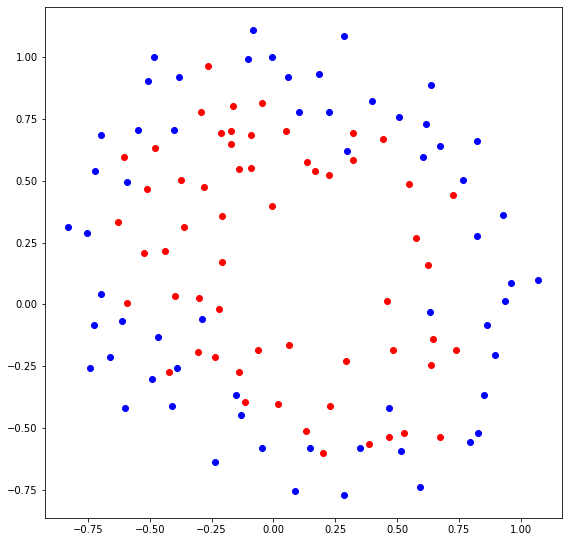

In [0]:
#plot the data

plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [0]:
#Plot the training error

plt.figure(figsize=(8, 8))
plt.scatter(range(num+1), cost_h0, c='blue')
plt.scatter(range(num+1), cost_h1, c='green')
plt.scatter(range(num+1), cost_h2, c='red')
plt.show()


In [0]:
#Plot the training accuracy

plt.figure(figsize=(8, 8))
plt.scatter(range(num+1), accuracy_rate0, c='blue')
plt.scatter(range(num+1), accuracy_rate1, c='green')
plt.scatter(range(num+1), accuracy_rate2, c='red')
plt.show()

In [0]:
#Write down the final training accuracy
print(accuracy_rate0[num]*100)
print(accuracy_rate1[num]*100)
print(accuracy_rate2[num]*100)

In [35]:
#Plot the optimal classifier superimposed on the training data

plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

xla = -np.linspace(-1.0,+1.0,1000)
yla = np.linspace(-1.0,+1.0,1000)
X,Y = np.meshgrid(xla,yla)
count = 0
eqn = np.zeros((1000,1000))
for i in range(10):
  for j in range(10):
    eqn[count] = tt[count]X**i*Y**j
    count += 1
Z = 0
plt.contour(X,Y,eqn,[Z], colors='green')
plt.show()

SyntaxError: ignored